<center><h1>Ali_Hanan_HW2</h1></center>
<br>
<br>

| Key | Value |
| :- | :- |
| Name: | Hanan Ali |
| USC ID: | 1782313333 |
| GitHub Username: | hananali2023 |

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf

Get the Cycle Power Plant Data Set

In [24]:
data = "../CCPP/Folds5x2_pp.xlsx"

df = pd.read_excel(data)
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data

#### i. rows and columns

In [25]:
row_count = df.shape[0]
col_count = df.shape[1]
count = [[row_count, col_count]]
pd.DataFrame(data=count, columns=["Rows", "Columns"])

,Rows,Columns
0,9568,5


The columns represent the features which include temperature (AT), ambient pressure (AP), relative humidity (RH), exhaust vacuum (V) and energy output (PE). The rows represent the values of the respective feature when the power plant was set to work over a six year period. 

#### ii. pairwise scatterplots of all the varianbles

/Users/hanan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1, 'Scatter Plot of all independent variables')

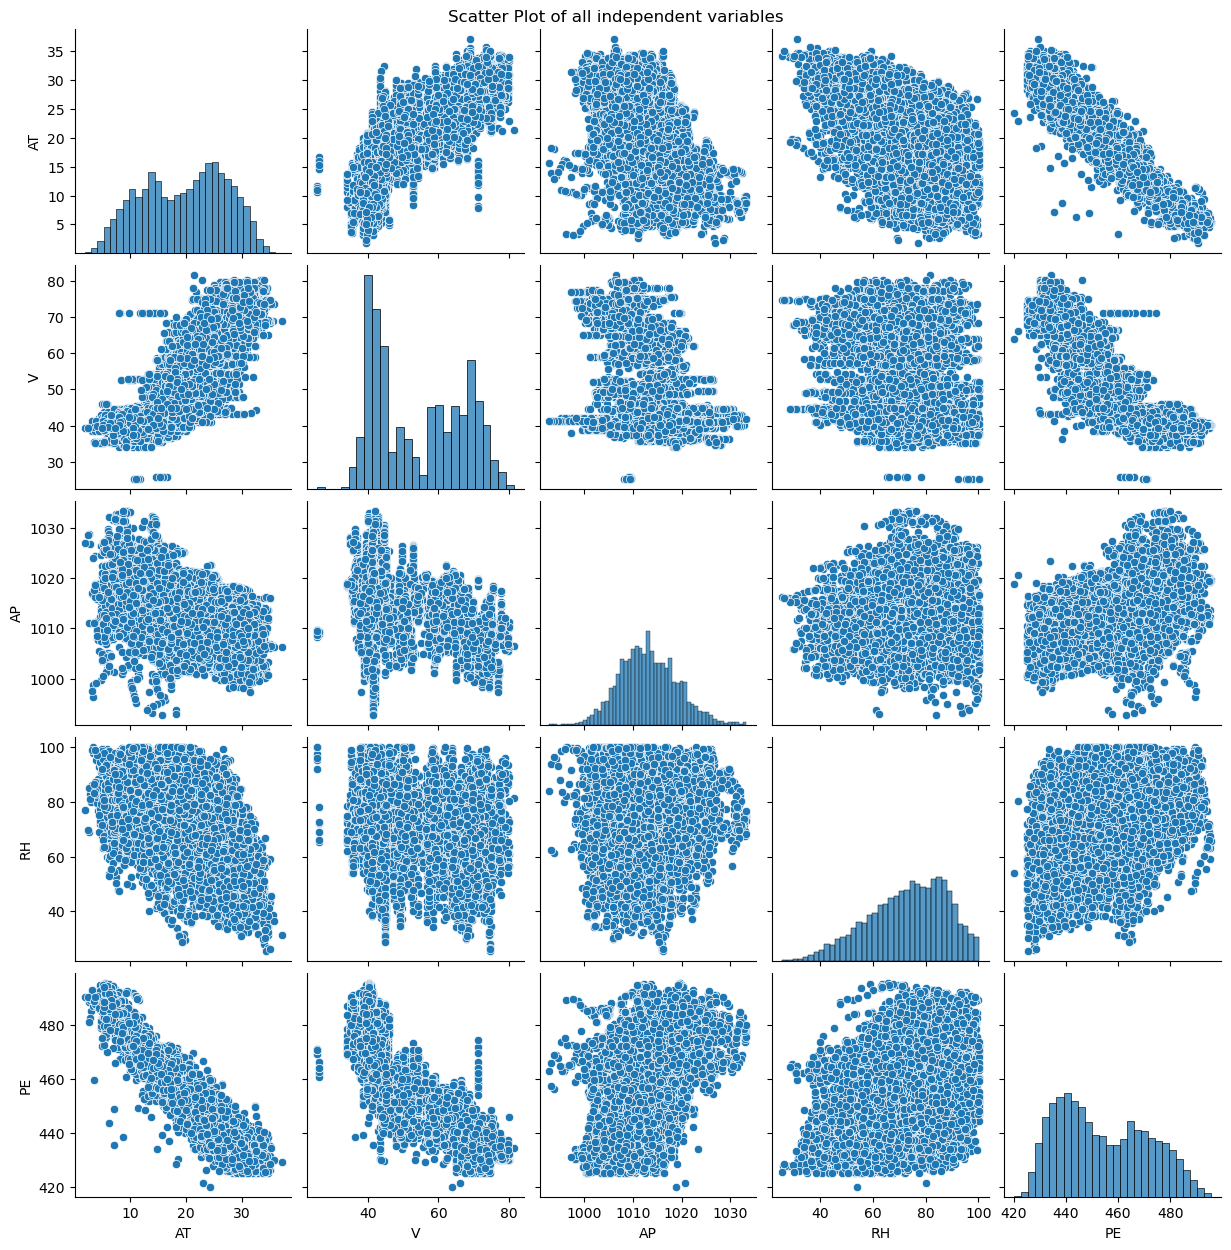

In [26]:
pairwise = sns.pairplot(data = df)
pairwise.fig.suptitle("Scatter Plot of all independent variables", y=1)

From the scatterplot, temperature (AT) and enery output (PE) have a strong negative correlation. Exhaust vacuum (V) and energy output (PE) also seems to have a negative correlation. However, the rest of the scatterplots do not have a correlation that can be concluded from this visualization. We need to further investigate and run correlation tests to see a clear correlation between the other features. 

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [27]:
summary_list = {}
mean_list = []
median_list = []
range_list = []
first_q_list = []
third_q_list = []
inter_q_list = []


for col in df.columns:
    mean_list.append(round(np.mean(df[col]), 2))
    median_list.append(round(np.median(df[col]), 2))
    range_list.append(round(np.max(df[col]) - np.min(df[col]), 2))
    firstq = np.quantile(df[col], 0.25)
    thirdq = np.quantile(df[col], 0.75)
    first_q_list.append(round(firstq, 2))
    third_q_list.append(round(thirdq, 2))
    inter_q_list.append(round(thirdq - firstq, 2))

summary_list = {
    "Variable": df.columns,
    "Mean": mean_list,
    "Median": median_list,
    "Range": range_list,
    "First Quartile": first_q_list,
    "Third Quartile": third_q_list,
    "Interquartile Range": inter_q_list
}

pd.DataFrame(summary_list)

,Variable,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
0,AT,19.65,20.34,35.30,13.51,25.72,12.21
1,V,54.31,52.08,56.20,41.74,66.54,24.80
2,AP,1013.26,1012.94,40.41,1009.10,1017.26,8.16
3,RH,73.31,74.97,74.60,63.33,84.83,21.50
4,PE,454.37,451.55,75.50,439.75,468.43,28.68


### (c) Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:05:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

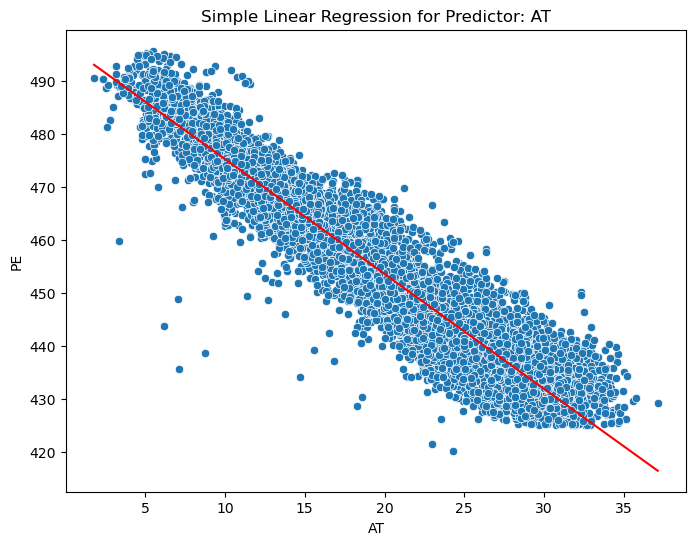

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:06:10   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

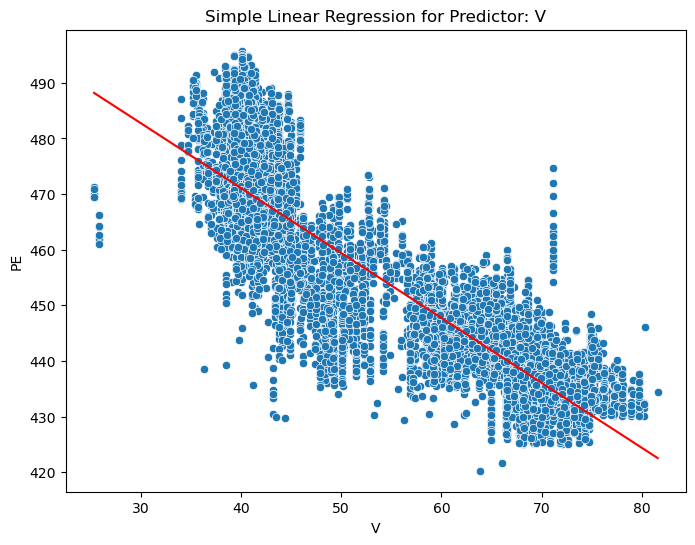

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:06:16   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

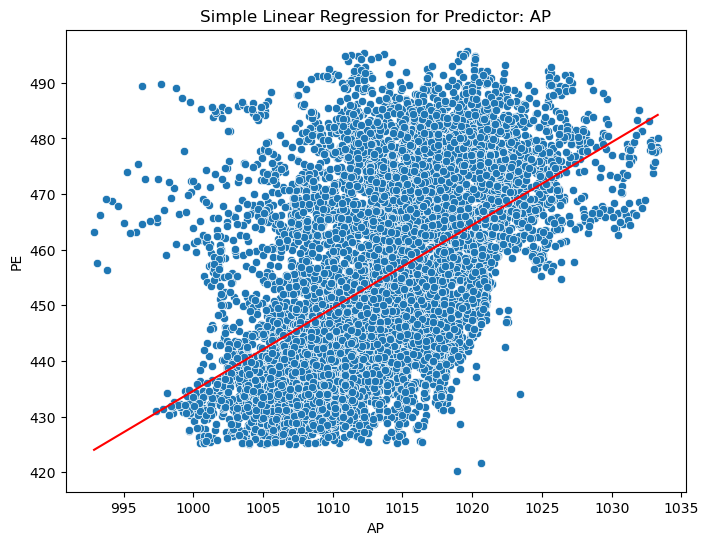

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:06:35   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

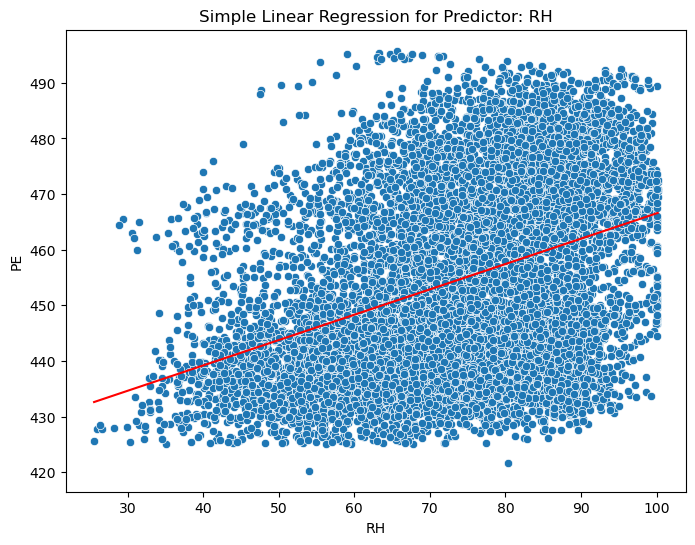

In [48]:
for predictor in ['AT', 'V', 'AP', 'RH']:
    X = df[predictor]
    y = df['PE']
    
    X = sm.add_constant(X)
    
    simple_model = sm.OLS(y, X).fit()
    
    y_pred = simple_model.predict(X)
    linear_mse = mean_squared_error(y, y_pred)
    
    print(simple_model.summary())
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[predictor], y=y)
    sns.lineplot(x=X[predictor], y=simple_model.predict(X), color='red')
    plt.title(f'Simple Linear Regression for Predictor: {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('PE')
    plt.show()


All the predictors had a p-value of 0, indicating a statistically significant association between the predictor and the target variable (PE). The R-squared value for each predictor was: 
   - AT: 0.899
   - V:  0.757
   - AP: 0.269
   - RH: 0.152

These values represent the proportion of the variance in the dependent variable (target variable) that is predictable from the independent variables (predictors) in a regression model.

### (d) Multiple Regression

In [47]:
X = df[['AT', 'V', 'AP', 'RH']]  
y = df['PE']  

X = sm.add_constant(X)

multi_model = sm.OLS(y, X).fit()

print(multi_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:04:59   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

The null hypothesis is rejected for all four predictors ('AT', 'V', 'AP', 'RH') because the p-value is 0. The multiple regression model appears to be a good fit for the data, with an R-squared value of 0.929, indicating that approximately 92.9% of the variance in the energy output (PE) can be explained by the predictors.




### (e) 1c Compare to 1d

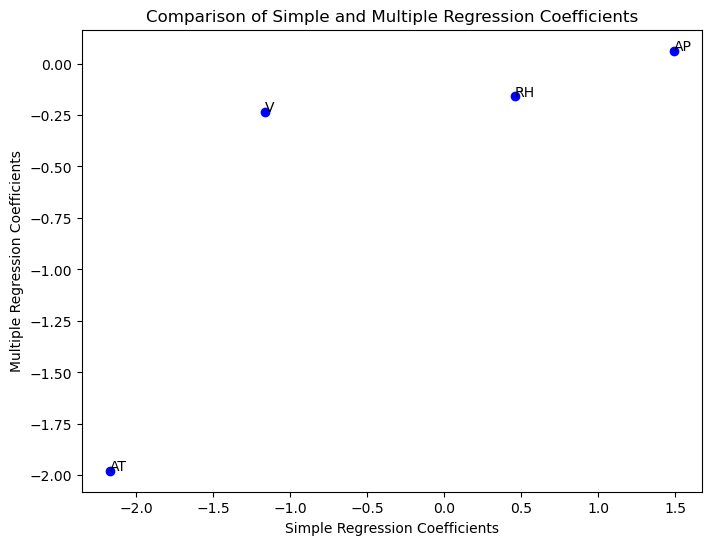

In [30]:
simple_coefficients = [-2.1713, -1.1681, 1.4899, 0.4557]


multi_coefficients = [-1.9775, -0.2339, 0.0621, -0.1581]  

predictors = ['AT', 'V', 'AP', 'RH']

plt.figure(figsize=(8, 6))
plt.scatter(simple_coefficients, multi_coefficients, color='blue')
plt.xlabel('Simple Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Comparison of Simple and Multiple Regression Coefficients')

for i, txt in enumerate(predictors):
    plt.annotate(txt, (simple_coefficients[i], multi_coefficients[i]))

plt.show()

### (f) Nonlinear Association

In [31]:
degree = 3  

X = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

poly_models_degree3 = {}

for predictor in X.columns:
    poly_features = [np.ones(len(X[predictor]))]  
    for i in range(1, degree + 1):
        poly_features.append(X[predictor]**i)
    poly_features = np.column_stack(poly_features)
    
    poly_model = sm.OLS(y, poly_features).fit()
    
    poly_models_degree3[predictor] = poly_model

    print(f"Polynomial Regression Model for {predictor} (Degree 3):")
    print(poly_model.summary())

Polynomial Regression Model for AT (Degree 3):
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:49:09   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

For predictors AT, AP, and RH, the p-value is very small, therefore, we can reject the null hypothesis. This means that the non-linear association between the three predictors and the response are significant. 

However, predictor V has a p-value of 0.768 for the quadatric term (x2) which is significant. This means we cannot reject the null hypothesis and there is no non-linear association between the predictors and response.


### (g) Interactions of Predictors

In [32]:
df['AT_V'] = df['AT'] * df['V']
df['AT_AP'] = df['AT'] * df['AP']
df['AT_RH'] = df['AT'] * df['RH']
df['V_AP'] = df['V'] * df['AP']
df['V_RH'] = df['V'] * df['RH']
df['AP_RH'] = df['AP'] * df['RH']

X_with_interactions = df[['AT', 'V', 'AP', 'RH', 'AT_V', 'AT_AP', 'AT_RH', 'V_AP', 'V_RH', 'AP_RH']]
y = df['PE']

X_with_interactions = sm.add_constant(X_with_interactions)

model_with_interactions = sm.OLS(y, X_with_interactions).fit()


print(model_with_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:49:09   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

The interaction terms 'AT_V', 'AT_RH', 'V_AP', and 'AP_RH' have p-values less than 0.05, indicating that these interaction terms are statistically significant.
The interaction terms 'AT_AP' and 'V_RH' have p-values greater than or equal to 0.05, suggesting that these interaction terms are not statistically significant.
Therefore, among the interaction terms considered, 'AT_V', 'AT_RH', 'V_AP', and 'AP_RH' show evidence of statistically significant associations with the response variable, while 'AT_AP' and 'V_RH' do not.

### (h) Improvement

In [33]:


X = df[['AT', 'V', 'AP', 'RH']]  
y = df['PE']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#train_70_x, test_30_x, train_70_y, test_30_y


lm = LinearRegression()
lm.fit(X_train, y_train)

# training set
train_preds = lm.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds)

# test set
test_preds = lm.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds)


print("Model with all predictors:")
print("Train MSE:", round(train_mse, 2))
print("Test MSE:", round(test_mse, 2))




# Interaction terms and nonlinearities
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

lm_poly = LinearRegression()
lm_poly.fit(X_poly_train, y_train)

# training set
train_preds_poly = lm_poly.predict(X_poly_train)
train_mse_poly = mean_squared_error(y_train, train_preds_poly)

# test set
test_preds_poly = lm_poly.predict(X_poly_test)
test_mse_poly = mean_squared_error(y_test, test_preds_poly)

print("\nModel with interaction terms and nonlinearities:")
print("Train MSE:", round(train_mse_poly,2))
print("Test MSE:", round(test_mse_poly, 2))

Model with all predictors:
Train MSE: 20.58
Test MSE: 21.24

Model with interaction terms and nonlinearities:
Train MSE: 17.08
Test MSE: 17.61


### (i) KNN

Best value of k: 5
Best train error: 10.6
Best test error: 15.73


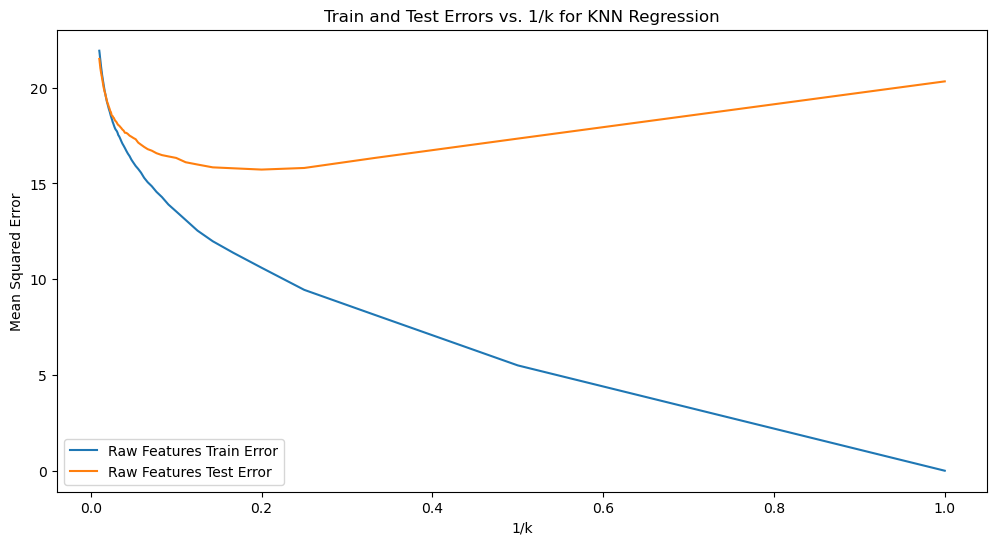

In [35]:
# Raw features
X_raw = df[['AT', 'V', 'AP', 'RH']]  
y = df['PE']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, random_state=42)


train_errors_raw = []
test_errors_raw = []


k_values = range(1, 101)

for k in k_values:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    
    knn_raw.fit(X_train_raw, y_train)
    
    train_preds_raw = knn_raw.predict(X_train_raw)
    test_preds_raw = knn_raw.predict(X_test_raw)
    
    train_mse_raw = mean_squared_error(y_train, train_preds_raw)
    test_mse_raw = mean_squared_error(y_test, test_preds_raw)
    
    train_errors_raw.append(train_mse_raw)
    test_errors_raw.append(test_mse_raw)

    
best_k_index = np.argmin(test_errors_raw)
best_k = k_values[best_k_index]
best_train_error = train_errors_raw[best_k_index]
best_test_error = test_errors_raw[best_k_index]

print("Best value of k:", best_k)
print("Best train error:", round(best_train_error, 2))
print("Best test error:", round(best_test_error, 2))


plt.figure(figsize=(12, 6))
plt.plot(1/np.array(k_values), train_errors_raw, label='Raw Features Train Error')
plt.plot(1/np.array(k_values), test_errors_raw, label='Raw Features Test Error')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression')
plt.legend()
plt.show()

Best value of k: 4
Best train error: 8.49
Best test error: 14.35


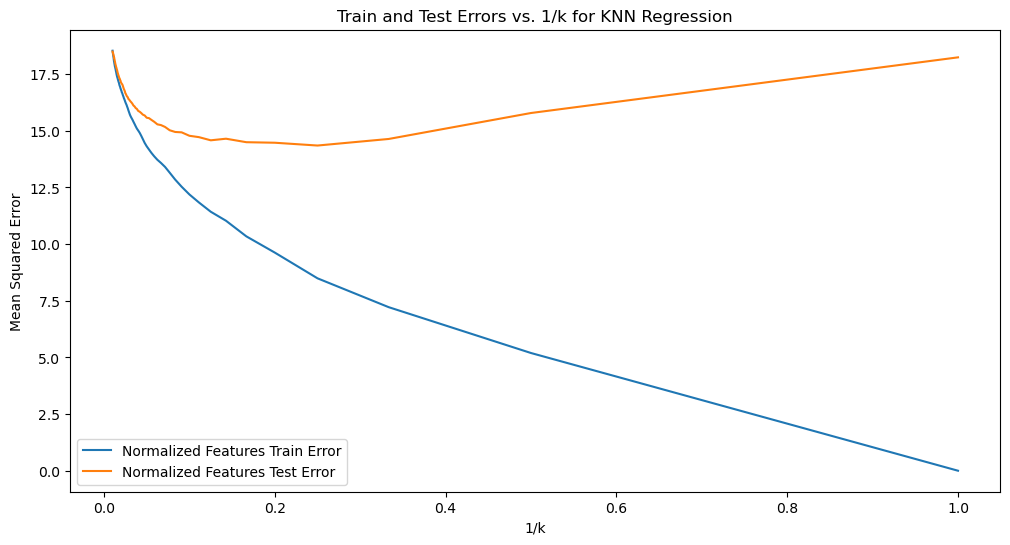

In [36]:
# Normalized features
X_normalized = MinMaxScaler().fit_transform(X_raw)  
y = df['PE']

X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

train_errors_normalized = []
test_errors_normalized = []
min_index=0

k_values = range(1, 101)

for k in k_values:
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    
    knn_normalized.fit(X_train_normalized, y_train)
    
    train_preds_normalized = knn_normalized.predict(X_train_normalized)
    test_preds_normalized = knn_normalized.predict(X_test_normalized)
    
    train_mse_normalized = mean_squared_error(y_train, train_preds_normalized)
    test_mse_normalized = mean_squared_error(y_test, test_preds_normalized)
    
    train_errors_normalized.append(train_mse_normalized)
    test_errors_normalized.append(test_mse_normalized)
    
    if test_mse_normalized < test_errors_normalized[min_index]:
        min_index = k -1;


best_k_index = np.argmin(test_errors_normalized)
best_k = k_values[best_k_index]


best_train_error_normalized = train_errors_normalized[best_k_index]
best_test_error_normalized = test_errors_normalized[best_k_index]

print("Best value of k:", best_k)
print("Best train error:", round(best_train_error_normalized, 2))
print("Best test error:", round(best_test_error_normalized, 2))


plt.figure(figsize=(12, 6))
plt.plot(1/np.array(k_values), train_errors_normalized, label='Normalized Features Train Error')
plt.plot(1/np.array(k_values), test_errors_normalized, label='Normalized Features Test Error')
plt.xlabel('1/k')
plt.ylabel('Mean Squared Error')
plt.title('Train and Test Errors vs. 1/k for KNN Regression')
plt.legend()
plt.show()


### (j ) Compare KNN and Linear

In [50]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

linear_reg_preds_test = linear_reg_model.predict(X_test)
linear_reg_preds_train = linear_reg_model.predict(X_train)

linear_reg_mse_test = mean_squared_error(y_test, linear_reg_preds_test)
linear_reg_mse_train = mean_squared_error(y_train, linear_reg_preds_train)

best_k = 5
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

knn_preds_test = knn_model.predict(X_test)
knn_preds_train = knn_model.predict(X_train)

knn_mse_test = mean_squared_error(y_test, knn_preds_test)
knn_mse_train = mean_squared_error(y_train, knn_preds_train)


print("Linear Regression Train MSE:", round(linear_reg_mse_train, 2))
print("Linear Regression Test MSE:", round(linear_reg_mse_test, 2))
print("KNN Regression Train MSE:", round(knn_mse_train, 2))
print("KNN Regression Test MSE:", round(knn_mse_test, 2))

Linear Regression Train MSE: 20.58
Linear Regression Test MSE: 21.24
KNN Regression Train MSE: 10.6
KNN Regression Test MSE: 15.73


In [58]:
# Train and Test MSE
errors = {
    "KNN_raw": {"train": min(train_errors_raw), "test": round(min(test_errors_raw), 2)},
    "KNN_normalized": {"train": min(train_errors_normalized), "test": round(min(test_errors_normalized), 2)},
    "Linear_regression": {"train": round(linear_reg_mse_train, 2), "test": round(linear_reg_mse_train, 2)},
    "Polynomial": {"train": round(train_mse_poly, 2), "test": round(test_mse_poly, 2)}

}

errors_df = pd.DataFrame(errors)

errors_df = errors_df.transpose()

errors_df.reset_index(inplace=True)

errors_df.columns = ["Model", "Train MSE", "Test MSE"]

errors_df

,Model,Train MSE,Test MSE
0,KNN_raw,0.00,15.73
1,KNN_normalized,0.00,14.35
2,Linear_regression,20.58,20.58
3,Polynomial,17.08,17.61


Both KNN Regression models (raw and normalized) outperform the linear regression model with the smallest test MSE, as their test MSEs are lower. This suggests that, based on the test MSE alone, the KNN Regression models provide a better fit to the data compared to the linear regression model.

## 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally
expect the performance of a flexible statistical learning method to be
better or worse than an inflexible method. Justify your answer.

### (a) The sample size n is extremely large, and the number of predictors p is small.

- With an extremely large sample size and small number of predictors, flexible methods can capture complex patterns in the data without overfitting. Flexible methods can adapt well to large datasets and find patterns that might be missed by simpler inflexible methods.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

- With a large number of predictors and small number of observations, a flexible model is more prone to overfitting, since they may capture noise in the data. In this scenario, inflexible methods are less likely to overfit.

### (c) The relationship between the predictors and response is highly non-linear.

- A flexible method can capture complex non-linear relationships more effectively than inflexible methods. The case for this is because non-linear relationships often require models with flexibility to accurately represent the underlying patterns in the data. 

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

- High variance means there's a significant amount of noise which means that a flexible method will overfit the data. In this case, an inflexible method would be ideal since it is less affected by high variance of the error terms.

## 3. ISLR: 2.4.7

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

|   Obs. |   X1 |   X2 |   X3 | Y     |
|-------:|-----:|-----:|-----:|:------|
|      1 |    0 |    3 |    0 | Red   |
|      2 |    2 |    0 |    0 | Red   |
|      3 |    0 |    1 |    3 | Red   |
|      4 |    0 |    1 |    2 | Green |
|      5 |   -1 |    0 |    1 | Green |
|      6 |    1 |    1 |    1 | Red   |


Suppose we wish to use this data set to make a prediction for Y when
X1 = X2 = X3 = 0 using K-nearest neighbors.

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [110]:
X_train = np.array([[0, 3, 0],
                    [2, 0, 0],
                    [0, 1, 3],
                    [0, 1, 2],
                    [-1, 0, 1],
                    [1, 1, 1]])


X_test = np.array([0, 0, 0])

# calculate Euclidean distance between observation and test point
distances = np.sqrt(np.sum((X_train - X_test)**2, axis=1))


df = pd.DataFrame({'Euclidean Distance': distances}, index = [1,2,3,4,5,6])
df

,Euclidean Distance
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


### (b) What is our prediction with K = 1? Why?

- The closest observation to the test point when K = 1 is Observation 5. This means that K = 1 is classified in the "Green" class, since Observation 5 is "Green".

### (c) What is our prediction with K = 3? Why?

- When K = 3, the closest observations to the test point are Observation 2, 5, and 6. Their respective classes are "Red", "Green", and "Red". The majority of the classes when K = 3 is "Red", meaning our prediction output is going to be "Red".

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

- The K value would be small rather than large because a smaller K corresponds to a flexible model. Since our scenario has a highly nonlinear Bayes decision boundary, we want our K to b


in a scenario with a highly nonlinear Bayes decision boundary, we would typically expect the best value for 
�
K to be small, as it allows the K-nearest neighbors algorithm to better capture the nonlinearities present in the data.